In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error

from datetime import timedelta

In [64]:
df = pd.read_csv('D://capston_ml/tfrs/dataset/train.csv', nrows=500000)
test = pd.read_csv('D://capston_ml/tfrs/dataset/test.csv', nrows=500000)

In [65]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [66]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [67]:
df.shape

(500000, 24)

In [68]:
test.shape

(500000, 22)

In [69]:
df.isnull().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    182317
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                         507
srch_co                         507
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [70]:
test.isnull().sum()

id                                0
date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    167155
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                           4
srch_co                           4
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
dtype: int64

In [71]:
df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [72]:
test.columns

Index(['id', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market'],
      dtype='object')

In [73]:
bookings = df[df['is_booking'] == 1].drop('is_booking', axis=1)

In [74]:
bookings.shape

(41054, 23)

In [75]:
bookings.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    13924
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                          0
srch_co                          0
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

In [76]:
bookings.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [77]:
bookings['date_time'] = pd.to_datetime(bookings['date_time'], format = '%Y-%m-%d').dt.normalize()
bookings['srch_ci'] = pd.to_datetime(bookings['srch_ci'], format = '%Y-%m-%d')
bookings['srch_co'] = pd.to_datetime(bookings['srch_co'], format = '%Y-%m-%d')

In [78]:
bookings[bookings['srch_ci'] < bookings['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co
88347,2014-06-07,2014-06-06,2014-06-07
206593,2014-09-02,2014-09-01,2014-09-04
412643,2013-08-12,2013-08-11,2013-08-12
451499,2014-07-10,2014-07-09,2014-07-12
485463,2014-11-18,2014-11-17,2014-11-18


In [79]:
bookings[bookings['srch_co'] < bookings['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [80]:
test[test['srch_ci'] < test['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co
3,2015-09-14 14:49:10,2015-09-14,2015-09-16
20,2015-09-01 06:09:06,2015-09-01,2015-09-03
31,2015-10-18 22:00:24,2015-10-18,2015-10-20
48,2015-10-12 15:12:49,2015-10-12,2015-10-14
50,2015-09-11 18:52:25,2015-09-11,2015-09-13
...,...,...,...
499926,2015-03-08 10:55:41,2015-03-08,2015-03-09
499930,2015-10-14 09:55:07,2015-10-14,2015-10-15
499932,2015-03-21 12:16:45,2015-03-21,2015-03-22
499959,2015-11-27 15:30:48,2015-11-27,2015-11-28


In [81]:
test[test['srch_co'] < test['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co
554,2015-09-22 19:39:21,2016-01-02,2015-12-25
1240,2015-06-23 21:00:15,2015-07-02,2015-07-01
2053,2015-11-23 18:44:40,2016-01-30,2016-01-18
2361,2015-07-08 22:43:56,2015-07-21,2015-07-18
2984,2015-06-28 21:44:22,2015-11-24,2015-11-21
...,...,...,...
492881,2015-08-11 14:59:51,2015-09-11,2015-09-05
493381,2015-12-16 12:29:11,2016-02-06,2016-02-02
494906,2015-10-31 12:48:22,2016-11-05,2016-05-15
499345,2015-07-22 22:25:37,2015-10-11,2015-10-08


In [82]:
bookings['date_time'] = np.where(bookings['srch_ci'] < bookings['date_time'],
                                 bookings['srch_ci'],
                                 bookings['date_time'])

test['date_time'] = np.where(test['srch_ci'] < test['date_time'],
                                 test['srch_ci'],
                                 test['date_time'])

In [83]:
bookings[bookings['srch_ci'] < bookings['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [84]:
test[test['srch_ci'] < test['date_time']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [85]:
bookings['srch_ci'], bookings['srch_co'] = np.where(bookings['srch_co'] < bookings['srch_ci'],
                                                    (bookings['srch_co'], bookings['srch_ci']),
                                                    (bookings['srch_ci'], bookings['srch_co'])
                                                   )

test['srch_ci'], test['srch_co'] = np.where(test['srch_co'] < test['srch_ci'],
                                                    (test['srch_co'], test['srch_ci']),
                                                    (test['srch_ci'], test['srch_co'])
                                                   )

In [86]:
bookings[bookings['srch_co'] < bookings['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [87]:
test[test['srch_co'] < test['srch_ci']][['date_time', 'srch_ci', 'srch_co']]

,date_time,srch_ci,srch_co


In [88]:
for x in bookings.columns:
    print(f'{x}: {bookings[x].nunique()}')

date_time: 724
site_name: 41
posa_continent: 5
user_location_country: 149
user_location_region: 621
user_location_city: 5449
orig_destination_distance: 24262
user_id: 11017
is_mobile: 2
is_package: 2
channel: 11
srch_ci: 999
srch_co: 1003
srch_adults_cnt: 10
srch_children_cnt: 10
srch_rm_cnt: 9
srch_destination_id: 6462
srch_destination_type_id: 7
cnt: 5
hotel_continent: 6
hotel_country: 161
hotel_market: 1666
hotel_cluster: 100


In [89]:
groupby_cluster = bookings.groupby('hotel_cluster').nunique()
groupby_cluster

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market
hotel_cluster,,,,,,,,,,,,,,,,,,,,,
0,199,11,5,18,64,176,165,214,2,2,...,198,7,4,4,65,6,3,3,6,29
1,346,14,5,26,96,307,323,389,2,2,...,353,8,5,5,12,6,2,1,1,3
2,416,27,5,50,181,443,344,528,2,2,...,420,8,5,7,282,6,2,6,46,162
3,138,16,5,31,72,130,83,137,2,2,...,136,5,4,3,129,6,1,5,43,111
4,319,17,4,33,99,316,318,393,2,2,...,341,7,4,4,181,5,2,6,15,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,466,21,5,38,133,486,552,631,2,2,...,473,8,7,7,202,6,3,5,15,67
96,174,9,4,16,53,155,162,179,2,2,...,170,7,5,5,101,5,2,4,15,62
97,272,18,5,42,133,269,203,310,2,2,...,294,6,5,4,132,6,2,6,34,78


In [90]:
groupby_country = bookings.groupby('hotel_country').nunique()
groupby_country.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_market,hotel_cluster
hotel_country,,,,,,,,,,,,,,,,,,,,,
0,63,8,2,14,32,44,31,37,2,2,...,70,5,5,3,15,5,1,1,3,17
1,18,5,2,10,13,15,7,12,2,2,...,18,2,2,1,6,4,2,1,1,8
2,7,2,2,5,6,6,1,5,2,1,...,7,2,3,2,2,2,1,1,1,6
3,7,4,3,5,5,5,0,5,1,1,...,11,3,1,1,4,1,1,1,3,6
4,15,7,2,8,13,15,7,15,1,2,...,15,4,2,2,2,2,1,1,1,6


In [91]:
groupby_country[groupby_country['hotel_continent'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_market,hotel_cluster
hotel_country,,,,,,,,,,,,,,,,,,,,,


In [92]:
groupby_market = bookings.groupby('hotel_market').nunique()
groupby_market.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_cluster
hotel_market,,,,,,,,,,,,,,,,,,,,,
1,3,3,2,2,3,3,0,3,1,1,...,4,1,1,1,4,3,1,1,1,4
2,217,18,5,31,125,205,109,218,2,2,...,215,7,4,4,13,5,2,1,1,51
3,7,4,2,4,7,7,2,7,1,2,...,7,3,2,1,2,2,1,1,1,6
4,154,16,5,28,86,136,79,146,2,2,...,157,8,3,4,11,5,1,1,1,31
5,78,13,5,21,60,72,33,67,2,2,...,74,6,3,3,4,4,1,1,1,18


In [93]:
groupby_market[groupby_market['hotel_continent'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_cluster
hotel_market,,,,,,,,,,,,,,,,,,,,,


In [94]:
groupby_market[groupby_market['hotel_country'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_cluster
hotel_market,,,,,,,,,,,,,,,,,,,,,
803,33,5,3,10,19,19,7,13,1,1,...,34,5,2,3,16,6,2,1,8,12
1463,49,8,4,14,34,41,26,41,2,2,...,51,4,3,2,5,4,1,1,2,24
1774,14,7,4,9,12,12,3,12,2,2,...,12,4,2,2,6,4,1,1,2,10
2079,3,1,1,1,3,3,3,3,1,1,...,4,2,1,1,2,1,1,1,2,3


In [95]:
groupby_destination_id = bookings.groupby('srch_destination_id').nunique()
groupby_destination_id.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,5,1,1,1,4,5,4,5,1,1,...,5,2,2,1,1,1,1,1,1,5
11,2,1,1,1,2,2,2,2,1,1,...,2,1,2,2,1,1,1,1,1,2
14,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16,2,1,1,1,2,2,2,2,2,1,...,2,1,1,1,1,1,1,1,1,1


In [96]:
groupby_destination_id[groupby_destination_id['hotel_continent'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,


In [97]:
groupby_destination_id[groupby_destination_id['hotel_country'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,
8799,32,7,4,12,26,30,20,31,2,2,...,32,3,3,2,1,1,1,2,2,19
11634,10,1,1,1,7,9,8,9,1,2,...,10,2,1,1,1,1,1,2,2,4
11850,36,5,2,6,21,32,30,31,2,2,...,39,6,4,2,1,2,1,2,4,17
15221,2,2,2,2,2,2,0,2,1,1,...,2,1,1,1,1,1,1,2,2,2
20895,8,4,3,6,7,7,1,6,2,1,...,6,3,1,2,1,1,1,2,1,5
22074,8,4,2,5,7,7,2,6,2,1,...,8,2,1,2,1,1,1,2,1,6


In [98]:
groupby_destination_id[groupby_destination_id['srch_destination_type_id'] != 1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
srch_destination_id,,,,,,,,,,,,,,,,,,,,,


In [99]:
groupby_user_id = bookings.groupby('user_id').nunique()
groupby_user_id.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
user_id,,,,,,,,,,,,,,,,,,,,,
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
190,2,1,1,1,1,1,3,1,1,2,...,2,1,2,4,3,1,2,2,3,3
192,5,1,1,1,1,2,5,1,1,3,...,3,2,3,5,2,1,2,2,5,5
229,1,1,1,1,1,1,2,1,1,1,...,1,1,1,2,1,1,1,2,2,2


In [100]:
groupby_user_location_city = bookings.groupby('user_location_city').nunique()
groupby_user_location_city[groupby_user_location_city['user_location_country'] != 1].head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
user_location_city,,,,,,,,,,,,,,,,,,,,,
431,26,3,3,3,9,21,13,2,2,6,...,3,3,2,25,5,1,3,7,23,23
478,7,4,4,3,4,5,6,1,2,2,...,3,1,1,7,3,1,3,5,7,6
538,10,3,2,3,8,6,8,2,2,4,...,3,3,2,10,5,1,2,4,10,8
1041,2,1,1,2,2,1,2,1,2,2,...,2,1,1,1,1,1,1,1,2,2
1062,2,2,1,2,2,1,2,1,2,1,...,2,1,1,3,1,1,1,2,3,3


In [101]:
groupby_user_location_city = bookings.groupby('user_location_city').nunique()
groupby_user_location_city[groupby_user_location_city['user_location_region'] != 1].head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
user_location_city,,,,,,,,,,,,,,,,,,,,,
76,116,3,3,1,3,140,88,2,2,7,...,5,3,3,123,5,1,5,23,93,71
120,6,1,1,1,2,6,4,1,1,4,...,3,3,2,5,3,1,1,1,5,6
151,8,1,1,1,2,8,5,2,2,3,...,3,1,2,8,3,1,3,4,8,8
274,30,3,3,1,3,28,12,2,2,4,...,4,2,4,27,4,1,4,4,26,18
431,26,3,3,3,9,21,13,2,2,6,...,3,3,2,25,5,1,3,7,23,23


In [125]:
bookings['date_time'] = pd.to_datetime(bookings['date_time'], format = '%Y-%m-%d').dt.normalize()
bookings['srch_ci'] = pd.to_datetime(bookings['srch_ci'], format = '%Y-%m-%d', errors='coerce')
bookings['srch_co'] = pd.to_datetime(bookings['srch_co'], format = '%Y-%m-%d', errors='coerce')

In [126]:
groupby_site_name = bookings.groupby('site_name').nunique()
groupby_site_name[groupby_site_name['posa_continent'] != 1]

,date_time,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,days_to_checkin,stay_length,month_of_booking,month_of_staying
site_name,,,,,,,,,,,,,,,,,,,,,


In [127]:
bookings['days_to_checkin'] = (bookings['srch_ci'] - bookings['date_time']).dt.days
bookings['stay_length'] = (bookings['srch_co'] - bookings['srch_ci']).dt.days

In [128]:
bookings['month_of_booking'] = bookings['date_time'].dt.month
bookings['month_of_staying'] = bookings['srch_ci'].dt.month

In [129]:
bookings.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,days_to_checkin,stay_length,month_of_booking,month_of_staying
1,2014-08-11,2,3,66,348,48862,2234.2641,12,0,1,...,1,1,2,50,628,1,18,4,8,8
20,2014-02-27,2,3,66,318,52078,NaN,756,0,1,...,1,1,2,50,191,2,50,2,2,4
27,2013-06-15,30,4,195,548,56440,NaN,1048,0,1,...,1,1,0,185,185,58,83,8,6,9
72,2014-11-23,30,4,195,991,47725,NaN,1048,0,0,...,1,1,3,151,69,36,215,2,11,6
79,2014-01-03,2,3,66,462,41898,2454.8588,1482,0,1,...,1,1,2,50,680,95,50,5,1,2


In [130]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [131]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2):
    
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    phi2 = stat/obs
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(obs-1))    
    rcorr = r - ((r-1)**2)/(obs-1)
    kcorr = k - ((k-1)**2)/(obs-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

def crammer_v_matrix(df):
    
    rows= []
    for var1 in df:
        col = []
        for var2 in df:
            cramers =cramers_V(df[var1], df[var2]) # Cramer's V test
            col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
        rows.append(col)
    
    cramers_results = np.array(rows)
    matrix = pd.DataFrame(cramers_results, columns = df.columns, index =df.columns)
    
    return matrix

In [132]:
users = ['site_name', 'posa_continent', 'user_location_country',
         'user_location_region', 'user_location_city','user_id', 
         'is_mobile', 'is_package', 'channel', 'month_of_booking']

hotels = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 
          'srch_destination_id', 'srch_destination_type_id', 'cnt',
          'hotel_continent', 'hotel_country', 'hotel_market', 'days_to_checkin', 'stay_length','month_of_staying']

continuous = ['date_time','orig_destination_distance', 'srch_ci', 'srch_co']

target = ['hotel_cluster']

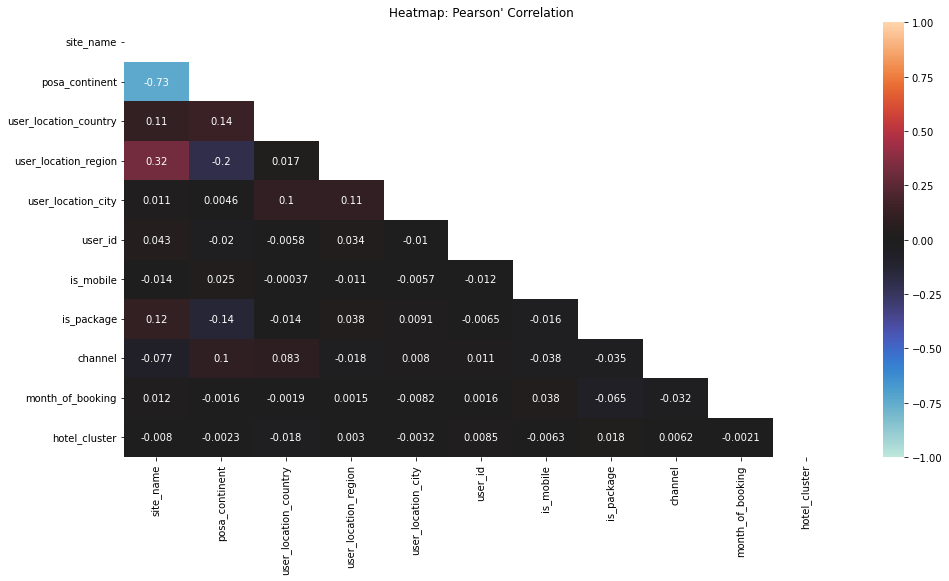

In [133]:
plt.figure(figsize = (16,8))
matrix = (bookings[users + target].corr())
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, mask = mask, annot = True, center = 0, vmin = -1, vmax = 1)
plt.title("Heatmap: Pearson' Correlation");

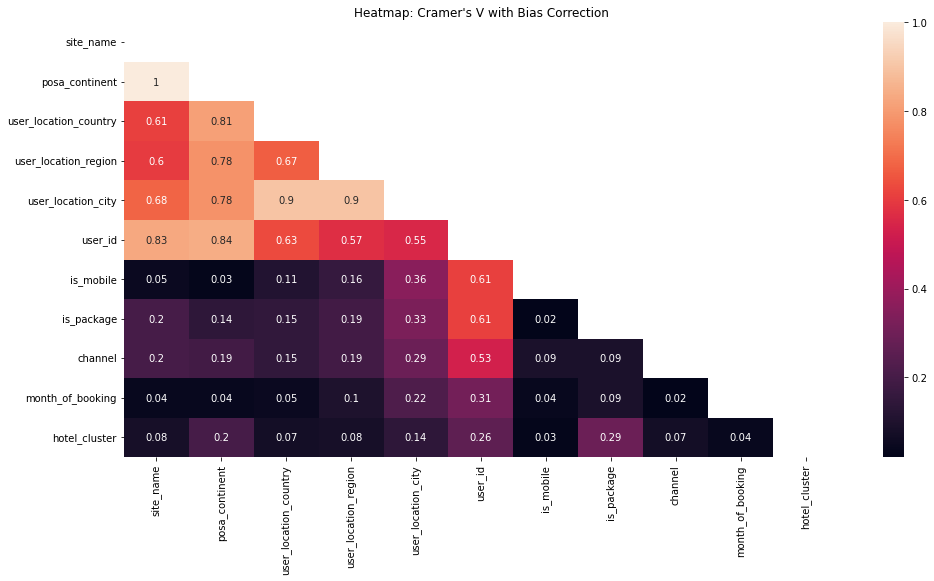

In [134]:
plt.figure(figsize = (16,8))
matrix = crammer_v_matrix(bookings[users + target])
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, mask = mask, annot = True)
plt.title("Heatmap: Cramer's V with Bias Correction");

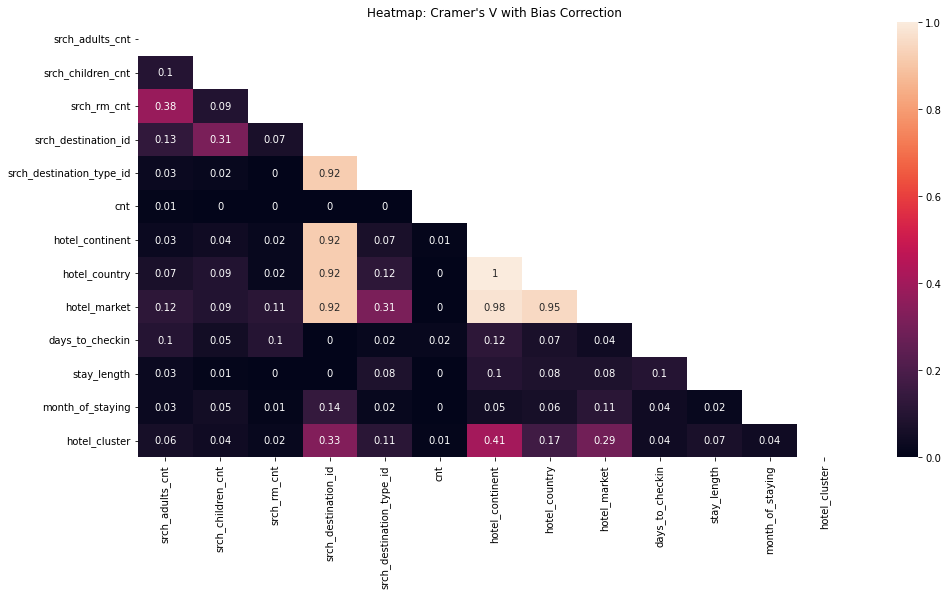

In [135]:
plt.figure(figsize = (16,8))
matrix = crammer_v_matrix(bookings[hotels + target])
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(matrix, mask = mask, annot = True)
plt.title("Heatmap: Cramer's V with Bias Correction");

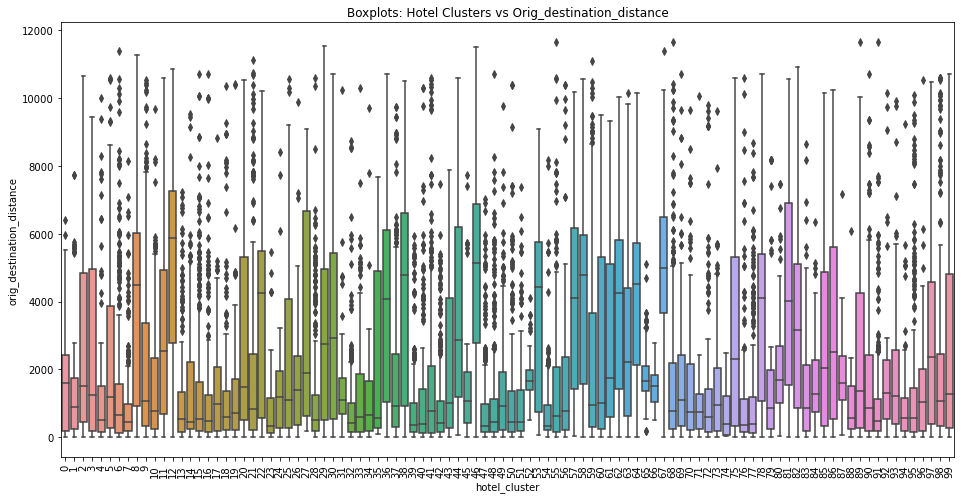

In [136]:
plt.figure(figsize = (16,8))
sns.boxplot(x='hotel_cluster', y = 'orig_destination_distance', data = bookings)
plt.xticks(rotation = 90);
plt.title('Boxplots: Hotel Clusters vs Orig_destination_distance');

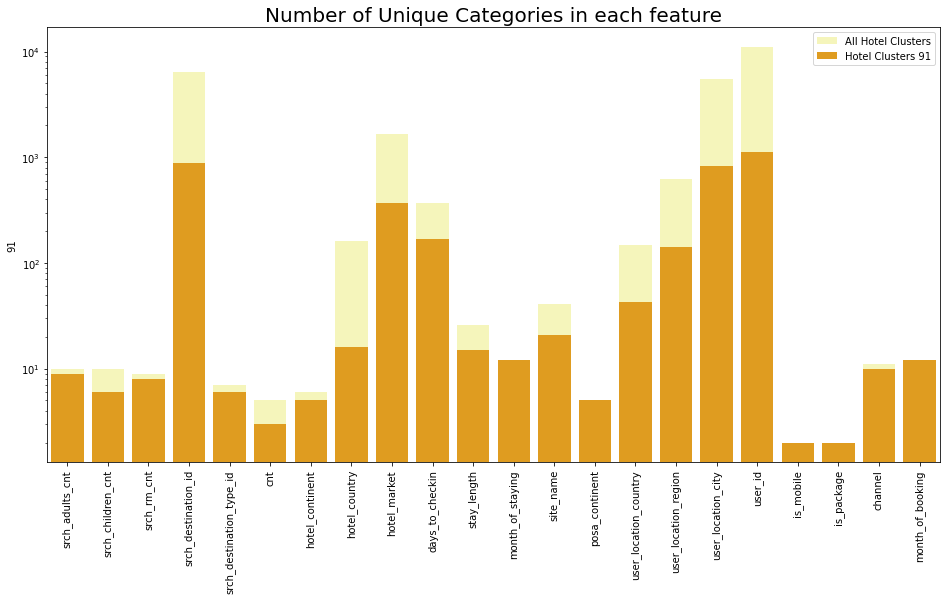

In [137]:
temp = hotels + users
groupby_cluster = bookings.groupby('hotel_cluster').nunique()
plt.figure(figsize = (16,8)),
sns.barplot(x=bookings[temp].columns, y=bookings[temp].nunique().values, color = 'yellow', alpha = 0.3, label = 'All Hotel Clusters')
plt.xticks(rotation = 90);
plt.yscale('log')
sns.barplot(x=groupby_cluster[temp].columns, y=groupby_cluster[temp].loc[91], color = 'orange', label = 'Hotel Clusters 91')
plt.title('Number of Unique Categories in each feature', fontsize = 20)
plt.legend();

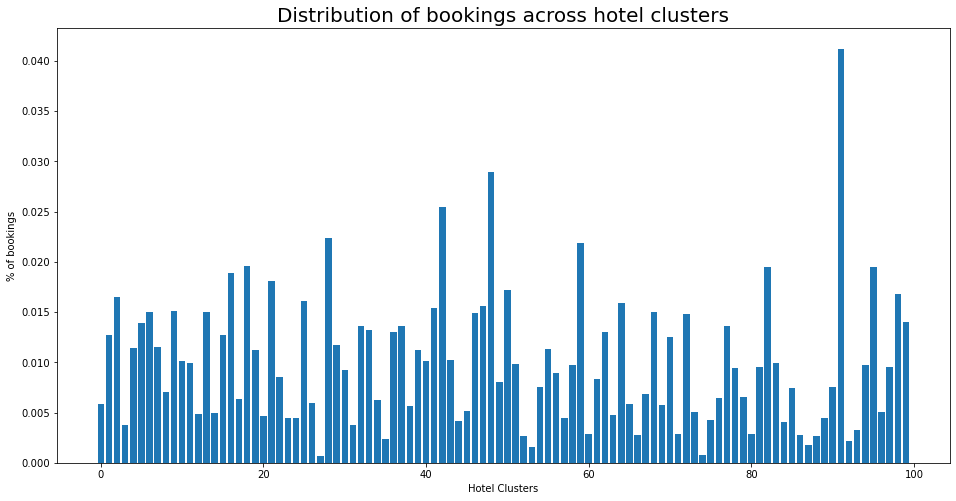

In [138]:
plt.figure(figsize = (16,8))
plt.bar(bookings['hotel_cluster'].value_counts(normalize = True).index, bookings['hotel_cluster'].value_counts(normalize = True).values);
plt.title('Distribution of bookings across hotel clusters', fontsize = 20)
plt.ylabel('% of bookings')
plt.xlabel('Hotel Clusters');

In [152]:
def final_clean(file, train = True):

    df_chunks = pd.read_csv(file, chunksize = 300000)

    chunk_list = []

    for chunk in df_chunks:
        
        #only taking the data with bookings
        if train:
            bookings = chunk[chunk['is_booking'] == 1].drop('is_booking', axis = 1)
        else:
            bookings = chunk

        # changing type to datetime
        bookings['date_time'] = pd.to_datetime(bookings['date_time'], format = '%Y-%m-%d').dt.normalize()
        bookings['srch_ci'] = pd.to_datetime(bookings['srch_ci'], format = '%Y-%m-%d', errors='coerce')
        bookings['srch_co'] = pd.to_datetime(bookings['srch_co'], format = '%Y-%m-%d', errors='coerce')
        
        #data cleaning for incorrectly input dates
        bookings['date_time'] = np.where(bookings['srch_ci'] < bookings['date_time'],
                                 bookings['srch_ci'],
                                 bookings['date_time'])

        bookings['srch_ci'], bookings['srch_co'] = np.where(bookings['srch_co'] < bookings['srch_ci'],
                                                            (bookings['srch_co'], bookings['srch_ci']),
                                                            (bookings['srch_ci'], bookings['srch_co'])
                                                           )
        
        #creating length of stay and days to checkin
        bookings['days_to_checkin'] = (bookings['srch_ci'] - bookings['date_time']).dt.days
        bookings['stay_length'] = (bookings['srch_co'] - bookings['srch_ci']).dt.days
        
        #creating length of stay and days to checkin
        bookings['month_of_booking'] = bookings['date_time'].dt.month
        bookings['month_of_staying'] = bookings['srch_ci'].dt.month

        col_to_drop = ['site_name','posa_continent',
                       'user_location_country','user_location_region',
                       'srch_destination_type_id',
                       'hotel_continent','hotel_country',
                       'orig_destination_distance', 'srch_ci', 'srch_co']
        
        bookings = bookings.drop(col_to_drop, axis = 1)
        
        chunk_list.append(bookings)

    return pd.concat(chunk_list)

In [153]:
df_concat = final_clean('D://capston_ml/tfrs/dataset/train.csv')
df_concat.head()

,date_time,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,cnt,hotel_market,hotel_cluster,days_to_checkin,stay_length,month_of_booking,month_of_staying
1,2014-08-11,48862,12,0,1,9,2,0,1,8250,1,628,1,18,4,8,8
20,2014-02-27,52078,756,0,1,4,2,0,1,8291,1,191,2,50,2,2,4
27,2013-06-15,56440,1048,0,1,9,2,0,1,1385,1,185,58,83,8,6,9
72,2014-11-23,47725,1048,0,0,9,2,0,1,8803,1,69,36,215,2,11,6
79,2014-01-03,41898,1482,0,1,1,3,0,2,12009,1,680,95,50,5,1,2


In [154]:
df_concat.isnull().sum()

date_time              0
user_location_city     0
user_id                0
is_mobile              0
is_package             0
channel                0
srch_adults_cnt        0
srch_children_cnt      0
srch_rm_cnt            0
srch_destination_id    0
cnt                    0
hotel_market           0
hotel_cluster          0
days_to_checkin        0
stay_length            0
month_of_booking       0
month_of_staying       0
dtype: int64

In [155]:
df_concat.shape

(3000693, 17)

In [156]:
df_concat

,date_time,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,cnt,hotel_market,hotel_cluster,days_to_checkin,stay_length,month_of_booking,month_of_staying
1,2014-08-11,48862,12,0,1,9,2,0,1,8250,1,628,1,18,4,8,8
20,2014-02-27,52078,756,0,1,4,2,0,1,8291,1,191,2,50,2,2,4
27,2013-06-15,56440,1048,0,1,9,2,0,1,1385,1,185,58,83,8,6,9
72,2014-11-23,47725,1048,0,0,9,2,0,1,8803,1,69,36,215,2,11,6
79,2014-01-03,41898,1482,0,1,1,3,0,2,12009,1,680,95,50,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37670275,2013-10-22,26232,1198182,0,0,0,1,0,1,24144,1,967,7,1,1,10,10
37670277,2013-10-30,24103,1198182,0,0,9,1,0,1,24144,1,967,42,0,1,10,10
37670281,2014-01-27,26232,1198182,0,1,0,1,0,1,8273,1,660,68,27,4,1,2
37670285,2014-07-15,26232,1198182,0,0,0,1,0,1,18811,1,592,77,12,1,7,7


In [157]:
df_concat.to_csv('D://capston_ml/tfrs/dataset/train_clean.csv', index = False)

In [158]:
test_concat = final_clean('D://capston_ml/tfrs/dataset/test.csv', train=False)

In [159]:
test_concat.isnull().sum()

id                      0
date_time               0
user_location_city      0
user_id                 0
is_mobile               0
is_package              0
channel                 0
srch_adults_cnt         0
srch_children_cnt       0
srch_rm_cnt             0
srch_destination_id     0
hotel_market            0
days_to_checkin        22
stay_length            22
month_of_booking        0
month_of_staying       22
dtype: int64

In [160]:
test_concat['days_to_checkin'].fillna(test_concat['days_to_checkin'].mode()[0], inplace=True)
test_concat['stay_length'].fillna(test_concat['stay_length'].mode()[0], inplace=True)
test_concat['month_of_staying'].fillna(test_concat['month_of_staying'].mode()[0], inplace=True)

In [161]:
test_concat.isnull().sum()

id                     0
date_time              0
user_location_city     0
user_id                0
is_mobile              0
is_package             0
channel                0
srch_adults_cnt        0
srch_children_cnt      0
srch_rm_cnt            0
srch_destination_id    0
hotel_market           0
days_to_checkin        0
stay_length            0
month_of_booking       0
month_of_staying       0
dtype: int64

In [162]:
test_concat.shape

(2528243, 16)

In [163]:
test_concat

,id,date_time,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,hotel_market,days_to_checkin,stay_length,month_of_booking,month_of_staying
0,0,2015-09-03,37449,1,1,0,3,2,0,1,12243,27,259.0,4.0,9,5.0
1,1,2015-09-24,37449,1,1,0,10,2,0,1,14474,1540,231.0,3.0,9,5.0
2,2,2015-06-07,17440,20,0,0,1,4,0,1,11353,699,49.0,1.0,6,7.0
3,3,2015-09-14,34156,28,0,1,10,2,0,1,8250,628,0.0,2.0,9,9.0
4,4,2015-07-17,36345,50,0,0,0,2,0,1,11812,538,5.0,1.0,7,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528238,2528238,2015-06-16,18037,1198754,1,0,3,2,1,1,8857,214,41.0,3.0,6,7.0
2528239,2528239,2015-07-25,48951,1198758,0,0,0,2,0,1,19308,1749,4.0,7.0,7,7.0
2528240,2528240,2015-03-14,17078,1198771,0,0,0,1,0,1,8250,628,65.0,1.0,3,5.0
2528241,2528241,2015-07-21,28561,1198775,0,0,10,2,0,1,4627,905,3.0,1.0,7,7.0


In [164]:
test_concat.to_csv('D://capston_ml/tfrs/dataset/test_clean.csv', index = False)